In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [4]:
uniques=np.unique(y_train)
print (uniques)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
no_unique = len(np.unique(y_train))
print (no_unique)

10


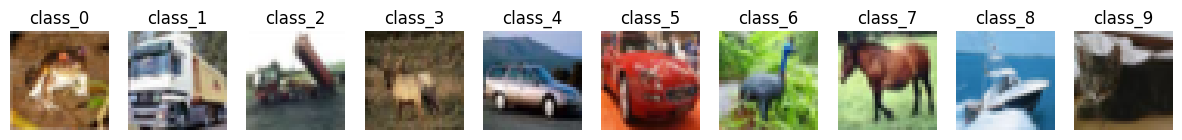

In [6]:
plt.figure(figsize=(15, 10))
for i in uniques:
    img = x_train[i]
    ax = plt.subplot(1, no_unique, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("class_" + str(i))

In [ ]:
x_train

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes=y_test.shape[1]

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
def declareModel():
  model=Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
    ])
  return model


In [14]:
model=declareModel()

#SGD Model

In [15]:
model.compile(optimizer=SGD(),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 86s 54ms/step - loss: 2.0753 - accuracy: 0.2424 - val_loss: 1.8449 - val_accuracy: 0.3329
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6747 - accuracy: 0.3950 - val_loss: 1.5647 - val_accuracy: 0.4218
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4759 - accuracy: 0.4681 - val_loss: 1.4828 - val_accuracy: 0.4775
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.3614 - accuracy: 0.5122 - val_loss: 1.3402 - val_accuracy: 0.5173
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.2671 - accuracy: 0.5509 - val_loss: 1.3174 - val_accuracy: 0.5350
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1902 - accuracy: 0.5807 - val_loss: 1.1758 - val_accuracy: 0.5750
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1266 - accuracy: 0.6011 - val_loss: 1.1093 -

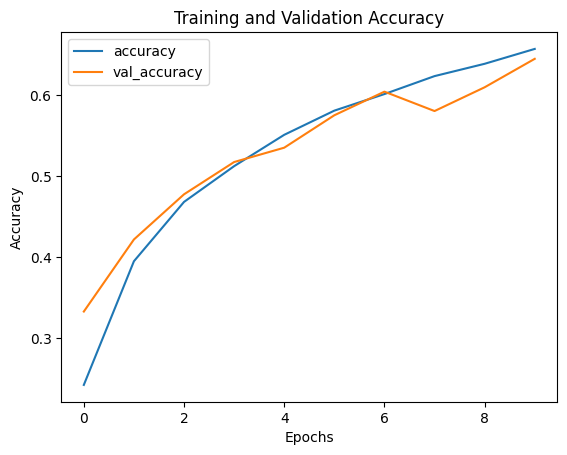

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
test_sdg_loss, test_sdg_acc = model.evaluate(x_test, y_test)
print(test_sdg_acc)

313/313 [==============================] - 4s 13ms/step - loss: 1.0053 - accuracy: 0.6446
0.644599974155426


#SGD with momentum Model

In [19]:
model_momentum=declareModel()

In [20]:
model_momentum.compile(optimizer=SGD(momentum=0.9),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
history_momentum = model_momentum.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6270 - accuracy: 0.4048 - val_loss: 1.2808 - val_accuracy: 0.5345
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.2185 - accuracy: 0.5678 - val_loss: 1.1110 - val_accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0579 - accuracy: 0.6265 - val_loss: 1.0921 - val_accuracy: 0.6123
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9482 - accuracy: 0.6677 - val_loss: 0.9972 - val_accuracy: 0.6565
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8552 - accuracy: 0.7008 - val_loss: 0.9691 - val_accuracy: 0.6669
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7913 - accuracy: 0.7225 - val_loss: 1.0170 - val_accuracy: 0.6508
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7323 - accuracy: 0.7422 - val_loss: 0.9651 -

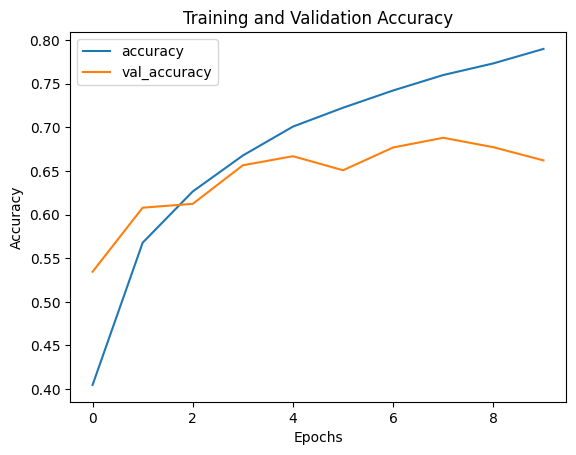

In [22]:
plt.plot(history_momentum.history['accuracy'], label='accuracy')
plt.plot(history_momentum.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
test_momentum_loss, test_momentum_acc = model_momentum.evaluate(x_test, y_test)
print(test_momentum_acc)

313/313 [==============================] - 5s 17ms/step - loss: 1.1078 - accuracy: 0.6621
0.6621000170707703


#Adagrad Model

In [24]:
model_adagrad=declareModel()

In [25]:
model_adagrad.compile(optimizer=Adagrad(),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
history_adagrad = model_adagrad.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 2.2482 - accuracy: 0.1758 - val_loss: 2.1384 - val_accuracy: 0.2130
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 2.0589 - accuracy: 0.2442 - val_loss: 2.0009 - val_accuracy: 0.2667
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.9741 - accuracy: 0.2819 - val_loss: 1.9497 - val_accuracy: 0.2925
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.9147 - accuracy: 0.3042 - val_loss: 1.8835 - val_accuracy: 0.3241
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8590 - accuracy: 0.3269 - val_loss: 1.8292 - val_accuracy: 0.3414
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.8067 - accuracy: 0.3503 - val_loss: 1.7786 - val_accuracy: 0.3600
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.7607 - accuracy: 0.3669 - val_loss: 1.7360 -

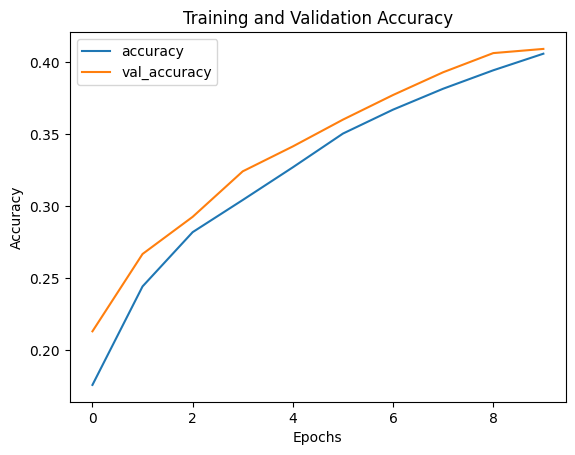

In [27]:
plt.plot(history_adagrad.history['accuracy'], label='accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
test_adagrad_loss, test_adagrad_acc = model_adagrad.evaluate(x_test, y_test)
print(test_adagrad_acc)

313/313 [==============================] - 6s 18ms/step - loss: 1.6429 - accuracy: 0.4091
0.4090999960899353


#RMS Model

In [29]:
model_RMS=declareModel()

In [30]:
model_RMS.compile(optimizer=RMSprop(),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
history_RMS = model_RMS.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5740 - accuracy: 0.4299 - val_loss: 1.6981 - val_accuracy: 0.4274
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1521 - accuracy: 0.5924 - val_loss: 1.1609 - val_accuracy: 0.5973
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9748 - accuracy: 0.6582 - val_loss: 1.1020 - val_accuracy: 0.6230
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8620 - accuracy: 0.6982 - val_loss: 0.9055 - val_accuracy: 0.6907
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7837 - accuracy: 0.7260 - val_loss: 1.1731 - val_accuracy: 0.6189
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7179 - accuracy: 0.7490 - val_loss: 1.0806 - val_accuracy: 0.6474
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6613 - accuracy: 0.7689 - val_loss: 0.9372 -

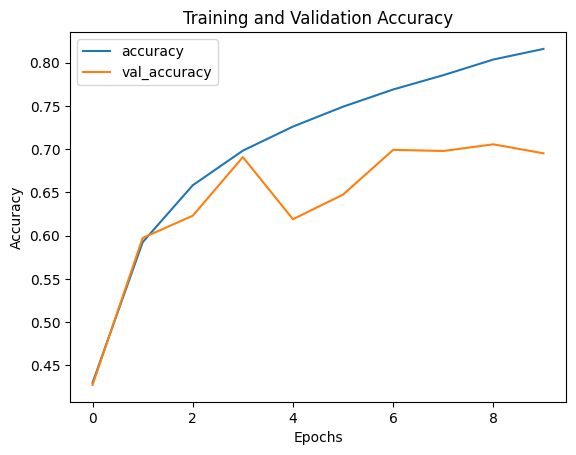

In [32]:
plt.plot(history_RMS.history['accuracy'], label='accuracy')
plt.plot(history_RMS.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
test_RMS_loss, test_RMS_acc = model_RMS.evaluate(x_test, y_test)
print(test_RMS_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.9489 - accuracy: 0.6951
0.6951000094413757


#Adam Model

In [34]:
model_adam=declareModel()

In [35]:
model_adam.compile(optimizer=Adam(),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.5376 - accuracy: 0.4369 - val_loss: 1.3027 - val_accuracy: 0.5291
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1911 - accuracy: 0.5772 - val_loss: 1.0962 - val_accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0425 - accuracy: 0.6328 - val_loss: 1.0198 - val_accuracy: 0.6378
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9431 - accuracy: 0.6680 - val_loss: 0.9759 - val_accuracy: 0.6570
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8775 - accuracy: 0.6925 - val_loss: 0.9131 - val_accuracy: 0.6842
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8206 - accuracy: 0.7136 - val_loss: 0.9441 - val_accuracy: 0.6754
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7737 - accuracy: 0.7311 - val_loss: 0.8979 -

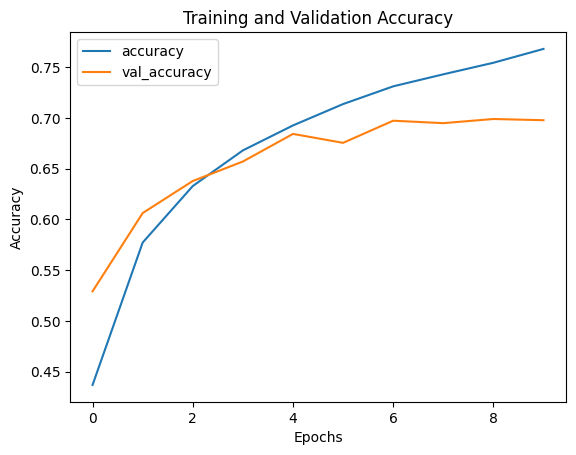

In [37]:
plt.plot(history_adam.history['accuracy'], label='accuracy')
plt.plot(history_adam.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
test_adam_loss, test_adam_acc = model_adam.evaluate(x_test, y_test)
print(test_adam_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.8778 - accuracy: 0.6977
0.697700023651123


In [47]:
models_names=['SDG','Momentum','Adagrad','RMS','Adam']
models_acc = np.array([test_sdg_acc,test_momentum_acc,test_adagrad_acc,test_RMS_acc,test_adam_acc])

<BarContainer object of 5 artists>

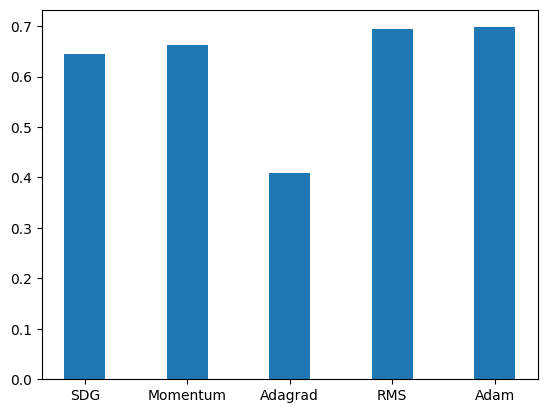

In [51]:
plt.bar(models_names, models_acc,0.4)

In [53]:
#Adam Model is the good onea